In [1]:
import pandas as pd
import numpy as np
bids = pd.read_csv('../data/bids.csv')
train_bidders = pd.read_csv('../data/train.csv')

In [3]:
# basic table info
print bids.info()
print
print train_bidders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB
None


In [ ]:
# Analyze one specific auction, dominated by a robot!!!
print train_bidders[train_bidders.bidder_id=='9655ccc7c0c193f1549475f02c54dce45kjw7']
print bids[bids.auction=='00270'][bids.bidder_id=='9655ccc7c0c193f1549475f02c54dce45kjw7'][['time', 'ip', 'device', 'country']].sort_values('time')
print bids[bids.auction=='00270'][['bidder_id', 'time', 'ip', 'country']].sort_values('time')

In [4]:
# remove useless info?
labels = ['payment_account', 'address']
train_bidders.drop(labels = labels, axis = 1, inplace = True)

In [ ]:
bids_with_label = pd.merge(bids, train_bidders, on='bidder_id')
print bids_with_label.info()
robots = bids_with_label[bids_with_label['outcome']==1]
human  = bids_with_label[bids_with_label['outcome']==0]
print robots.info()
print human.info()

In [13]:
robot_bidder_id = train_bidders[train_bidders['outcome']==1].bidder_id
print robots_bidder_id.shape
human_bidder_id = train_bidders[train_bidders['outcome']==0].bidder_id
print human_bidder_id.shape

(103,)
(1910,)


In [ ]:
print bids.info()
robot_bids = bids[bids['bidder_id'].isin(robot_bidder_id)]
print robot_bids.info()
human_bids = bids[bids['bidder_id'].isin(human_bidder_id)]
print human_bids.info()
useless_bids = bids[np.logical_not(bids['bidder_id'].isin(train_bidders.bidder_id))]
print useless_bids.info()
useful_bids = bids[bids['bidder_id'].isin(train_bidders.bidder_id)]
print useful_bids.info()
# useful_bids.to_csv('useful_bids.csv')
useless_bids.to_csv('test_bids.csv')

In [ ]:
def max_time_idx(group):
    return group['time'].idxmax()
idx = useful_bids.groupby('auction').apply(max_time_idx)
print idx.shape

last_bids = useful_bids.loc[idx]
print last_bids.info()
robot_last_bid_cnt = np.count_nonzero(last_bids['bidder_id'].isin(robot_bidder_id))
human_last_bid_cnt = np.count_nonzero(last_bids['bidder_id'].isin(human_bidder_id))
print robot_last_bid_cnt, robot_last_bid_cnt*1.0/robot_bids.shape[0]
print human_last_bid_cnt, human_last_bid_cnt*1.0/human_bids.shape[0]

In [32]:
print robot_last_bid_cnt *1.0 / robot_bidder_id.shape[0]
print human_last_bid_cnt *1.0 / human_bidder_id.shape[0]
print robot_bids.shape[0] * 1.0 / robot_bidder_id.shape[0]
print human_bids.shape[0] *1.0 / human_bidder_id.shape[0]

17.8349514563
5.70837696335
4004.03883495
1392.0460733


In [ ]:
# inspect payment_account and address, seems unable to probe into the hashed value
train_bidders = pd.read_csv('../data/train.csv')
print train_bidders.shape
print train_bidders['payment_account'].unique().shape
print train_bidders['address'].unique().shape

In [45]:
basic_info = pd.read_csv('basic_feat_per_bidder.csv')
robot_basic_info = basic_info[basic_info.bidder_id.isin(robot_bidder_id)]
human_basic_info = basic_info[basic_info.bidder_id.isin(human_bidder_id)]
from constants import *

In [48]:
print np.mean(robot_basic_info['bids_cnt']), np.mean(human_basic_info['bids_cnt'])
print np.mean(robot_basic_info['auction_cnt']), np.mean(human_basic_info['auction_cnt'])
print np.mean(robot_basic_info['mean_bids_per_auction']), np.mean(human_basic_info['mean_bids_per_auction'])
print np.mean(robot_basic_info['country_cnt']), np.mean(human_basic_info['country_cnt'])
print np.mean(robot_basic_info['device_cnt']), np.mean(human_basic_info['device_cnt'])
print np.mean(robot_basic_info['ip_cnt']), np.mean(human_basic_info['ip_cnt'])
print np.mean(robot_basic_info['url_cnt']), np.mean(human_basic_info['url_cnt'])
print np.mean(robot_basic_info['merchandise_cnt']), np.mean(human_basic_info['merchandise_cnt'])

4004.03883495 1413.50770867
145.038834951 58.0707070707
23.1546719631 6.44152520881
26.4757281553 12.6767676768
163.611650485 73.9473684211
2387.7961165 581.256246677
544.582524272 335.187134503
1.0 1.00053163211


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

tmp = robot_basic_info['bids_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['bids_cnt']), bins=robot_bids_cnt_bins)

width = (robot_bids_cnt_bins[1]-robot_bids_cnt_bins[0])/2
ax.bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, width=width, facecolor='cornflowerblue')
ax.bar(human_bids_cnt_bins[:-1]+width, human_bids_cnt_heights, width=width, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins
print robot_bids_cnt_heights, robot_bids_cnt_bins

[533 384 294 249 178 132  67  31  10   3] [  0.           1.31519863   2.63039725   3.94559588   5.2607945
   6.57599313   7.89119175   9.20639038  10.521589    11.83678763
  13.15198626]
[ 5  2  0  0 30 31 18 12  4  1] [  0.           1.19949503   2.39899006   3.59848509   4.79798012
   5.99747515   7.19697018   8.39646521   9.59596024  10.79545527
  11.9949503 ]


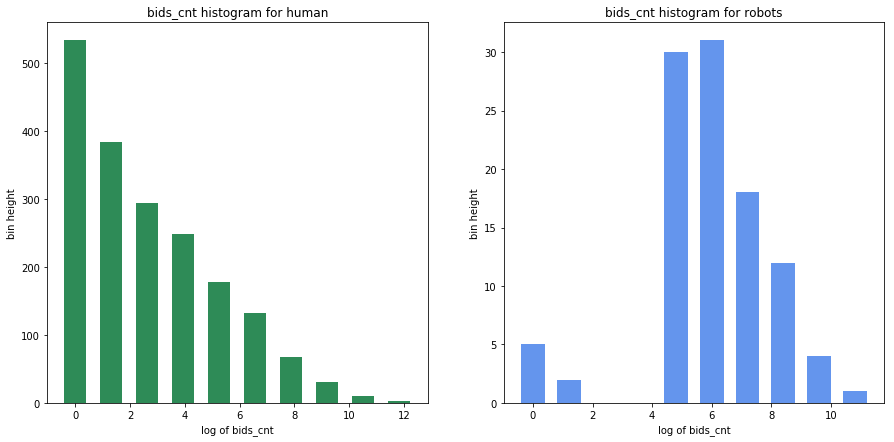

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,7))

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['bids_cnt']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
ax[0].set_ylabel('bin height')
ax[0].set_xlabel('log of bids_cnt')
ax[0].set_title('bids_cnt histogram for human')
print human_bids_cnt_heights, human_bids_cnt_bins

robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(robot_basic_info['bids_cnt']))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
ax[1].set_ylabel('bin height')
ax[1].set_xlabel('log of bids_cnt')
ax[1].set_title('bids_cnt histogram for robots')
print robot_bids_cnt_heights, robot_bids_cnt_bins
fig.savefig('bids_cnt_hist.png')

[117 104  88  39   2   0   0   0   0   0] [ 2.92012953  3.43886811  3.95760669  4.47634527  4.99508386  5.51382244
  6.03256102  6.5512996   7.07003818  7.58877676  8.10751534]
[15  8 12  5 13  7 16 11 13  3] [ 2.92012953  3.43886811  3.95760669  4.47634527  4.99508386  5.51382244
  6.03256102  6.5512996   7.07003818  7.58877676  8.10751534]


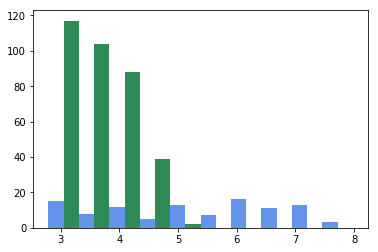

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

tmp = robot_basic_info['country_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['country_cnt']), bins=robot_bids_cnt_bins)

width = (robot_bids_cnt_bins[1]-robot_bids_cnt_bins[0])/2
ax.bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, width=width, facecolor='cornflowerblue')
ax.bar(human_bids_cnt_bins[:-1]+width, human_bids_cnt_heights, width=width, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins
print robot_bids_cnt_heights, robot_bids_cnt_binsbids_cnt

[591 256 263 176 153 124 105 108  72  33] [ 0.          0.50998664  1.01997329  1.52995993  2.03994657  2.54993321
  3.05991986  3.5699065   4.07989314  4.58987979  5.09986643]
[15  8 12  5 13  7 16 11 13  3] [ 2.92012953  3.43886811  3.95760669  4.47634527  4.99508386  5.51382244
  6.03256102  6.5512996   7.07003818  7.58877676  8.10751534]


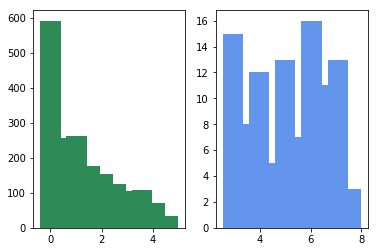

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['country_cnt']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['country_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

[179 149 134 122  87  35   6   1   0   0] [ 2.92012953  3.62435815  4.32858677  5.03281538  5.737044    6.44127262
  7.14550124  7.84972985  8.55395847  9.25818709  9.9624157 ]
[20  6  6  1  5 11 12 22 14  6] [ 2.92012953  3.62435815  4.32858677  5.03281538  5.737044    6.44127262
  7.14550124  7.84972985  8.55395847  9.25818709  9.9624157 ]


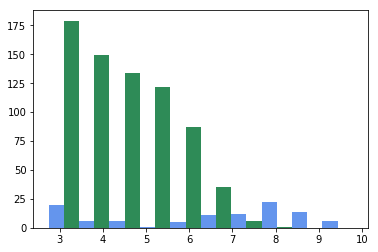

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

tmp = robot_basic_info['device_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['device_cnt']), bins=robot_bids_cnt_bins)

width = (robot_bids_cnt_bins[1]-robot_bids_cnt_bins[0])/2
ax.bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, width=width, facecolor='cornflowerblue')
ax.bar(human_bids_cnt_bins[:-1]+width, human_bids_cnt_heights, width=width, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins
print robot_bids_cnt_heights, robot_bids_cnt_bins

[582 202 236 210 179 160 146 117  39  10] [ 0.          0.78701659  1.57403319  2.36104978  3.14806638  3.93508297
  4.72209957  5.50911616  6.29613276  7.08314935  7.87016595]
[20  6  6  1  5 11 12 22 14  6] [ 2.92012953  3.62435815  4.32858677  5.03281538  5.737044    6.44127262
  7.14550124  7.84972985  8.55395847  9.25818709  9.9624157 ]


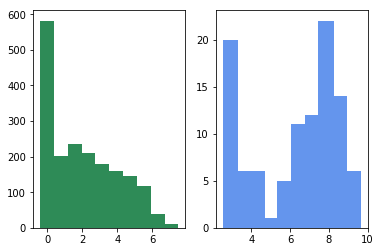

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['device_cnt']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['device_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

[259 199 149 107  62  24   7   2   0   0] [  2.92012953   4.08268171   5.24523388   6.40778605   7.57033823
   8.7328904    9.89544258  11.05799475  12.22054692  13.3830991
  14.54565127]
[16  4  6  5 23 23 14 10  1  1] [  2.92012953   4.08268171   5.24523388   6.40778605   7.57033823
   8.7328904    9.89544258  11.05799475  12.22054692  13.3830991
  14.54565127]


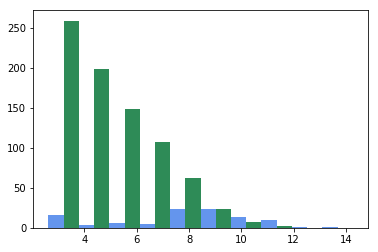

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

tmp = robot_basic_info['ip_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['ip_cnt']), bins=robot_bids_cnt_bins)

width = (robot_bids_cnt_bins[1]-robot_bids_cnt_bins[0])/2
ax.bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, width=width, facecolor='cornflowerblue')
ax.bar(human_bids_cnt_bins[:-1]+width, human_bids_cnt_heights, width=width, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins
print robot_bids_cnt_heights, robot_bids_cnt_bins

[610 318 276 237 168 127  86  40  16   3] [  0.           1.16005608   2.32011216   3.48016824   4.64022433
   5.80028041   6.96033649   8.12039257   9.28044865  10.44050473
  11.60056081]
[16  4  6  5 23 23 14 10  1  1] [  2.92012953   4.08268171   5.24523388   6.40778605   7.57033823
   8.7328904    9.89544258  11.05799475  12.22054692  13.3830991
  14.54565127]


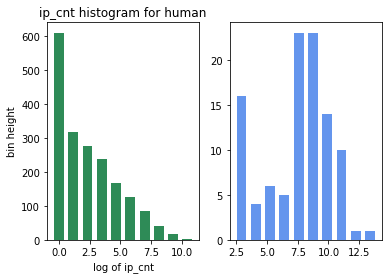

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['ip_cnt']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
ax[0].set_ylabel('bin height')
ax[0].set_xlabel('log of ip_cnt')
ax[0].set_title('ip_cnt histogram for human')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['ip_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

[153 143 107  64  52  25  17   8   3   1] [  2.92012953   3.82550988   4.73089024   5.63627059   6.54165094
   7.44703129   8.35241164   9.25779199  10.16317234  11.0685527
  11.97393305]
[20 14  5  6  7 10 14 15  9  3] [  2.92012953   3.82550988   4.73089024   5.63627059   6.54165094
   7.44703129   8.35241164   9.25779199  10.16317234  11.0685527
  11.97393305]


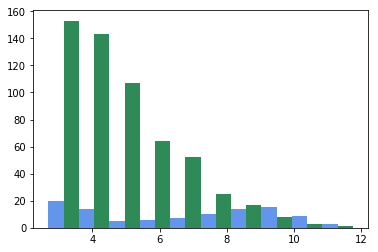

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

tmp = robot_basic_info['url_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['url_cnt']), bins=robot_bids_cnt_bins)

width = (robot_bids_cnt_bins[1]-robot_bids_cnt_bins[0])/2
ax.bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, width=width, facecolor='cornflowerblue')
ax.bar(human_bids_cnt_bins[:-1]+width, human_bids_cnt_heights, width=width, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins
print robot_bids_cnt_heights, robot_bids_cnt_bins

[875 290 224 186 139  73  54  25  11   4] [  0.           1.13068357   2.26136713   3.3920507    4.52273427
   5.65341783   6.7841014    7.91478497   9.04546853  10.1761521
  11.30683567]
[20 14  5  6  7 10 14 15  9  3] [  2.92012953   3.82550988   4.73089024   5.63627059   6.54165094
   7.44703129   8.35241164   9.25779199  10.16317234  11.0685527
  11.97393305]


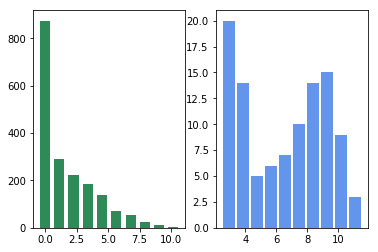

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['url_cnt']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['url_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

[1059  378  213  100   64   39   19    6    2    1] [ 0.          0.69309834  1.38619668  2.07929502  2.77239336  3.4654917
  4.15859004  4.85168838  5.54478672  6.23788506  6.93098341]
[ 5  4  8 23 26 24  8  1  1  3] [ 2.92012953  3.49851205  4.07689457  4.65527709  5.23365961  5.81204212
  6.39042464  6.96880716  7.54718968  8.1255722   8.70395472]


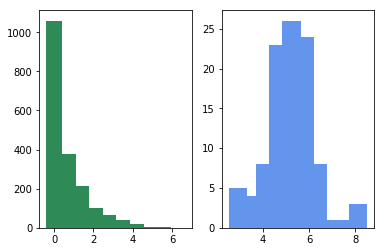

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['mean_bids_per_auction']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['mean_bids_per_auction'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

[534 190 237 236 209 166 139 101  53  16] [ 0.          0.73920316  1.47840631  2.21760947  2.95681263  3.69601578
  4.43521894  5.1744221   5.91362525  6.65282841  7.39203157]
[ 5  1  7  5 15 16 21 17  8  8] [ 2.92012953  3.61268905  4.30524857  4.99780809  5.69036761  6.38292713
  7.07548665  7.76804617  8.46060569  9.15316521  9.84572473]


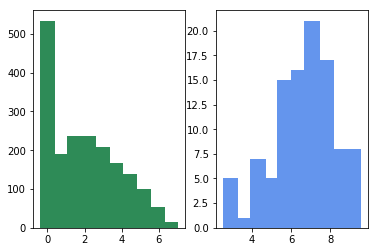

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(np.log(human_basic_info['auction_cnt']))
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['auction_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(np.log(tmp))
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

human_bids_cnt_heights, human_bids_cnt_bins = np.histogram(human_basic_info['merchandise_cnt'])
ax[0].bar(human_bids_cnt_bins[:-1], human_bids_cnt_heights, facecolor='seagreen')
print human_bids_cnt_heights, human_bids_cnt_bins

tmp = robot_basic_info['merchandise_cnt'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_bids_cnt_heights, robot_bids_cnt_bins = np.histogram(robot_basic_info['merchandise_cnt'])
ax[1].bar(robot_bids_cnt_bins[:-1], robot_bids_cnt_heights, facecolor='cornflowerblue')
print robot_bids_cnt_heights, robot_bids_cnt_bins

print np.min(human_basic_info['merchandise_cnt']), np.max(human_basic_info['merchandise_cnt']), np.mean(human_basic_info['merchandise_cnt'])
print np.min(robot_basic_info['merchandise_cnt']), np.max(robot_basic_info['merchandise_cnt']), np.mean(robot_basic_info['merchandise_cnt'])
print human_basic_info[human_basic_info['merchandise_cnt'] == 2].shape

In [85]:
for cat in categories:
    print cat, bids[bids['merchandise']==cat][bids.bidder_id.isin(robot_bidder_id)]['bidder_id'].unique().shape, bids[bids['merchandise']==cat][bids.bidder_id.isin(human_bidder_id)]['bidder_id'].unique().shape

 auto parts

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


 (0,) (2,)
books and music (5,) (89,)
clothing (0,) (5,)
computers (5,) (30,)
furniture (0,) (6,)
home goods (13,) (176,)
jewelry (13,) (364,)
mobile (32,) (735,)
office equipment (8,) (131,)
sporting goods (27,) (344,)


In [ ]:
for country in countries_list:
    a = bids[np.logical_and(bids['country']==country, bids.bidder_id.isin(robot_bidder_id))]['bidder_id'].unique().shape[0]
    b = bids[np.logical_and(bids['country']==country, bids.bidder_id.isin(human_bidder_id))]['bidder_id'].unique().shape[0]
    ratio = (a * 1.0 / b if b != 0 else np.nan)
    print country, a, b, ratio

0.0
7.61029473684e+13
[1799   31    0   11   15    0    1    6   11    7] [  0.           1.67356029   3.34712059   5.02068088   6.69424118
   8.36780147  10.04136177  11.71492206  13.38848236  15.06204265
  16.73560294]
[97  4  0  1  0  0  0  0  0  1] [  0.           1.5474538    3.09490761   4.64236141   6.18981522
   7.73726902   9.28472283  10.83217663  12.37963044  13.92708424
  15.47453805]
0.48594475861 0.0269097239797
0.0182365842546 0.0012037037822


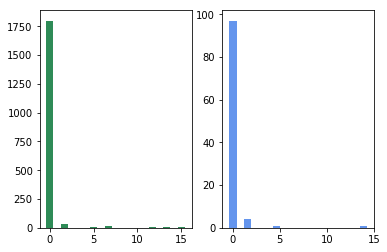

In [119]:
tdiff_ip_df = pd.read_csv('tdiff_change_ip_feat_per_bidder.csv')

one_day = 4547368124071.8799
startt = 9631916820392676.0
delta = 2.16e10
cutoff = 1.5e8 #cutoff for "small" time scales

print np.min(tdiff_ip_df['tdiff_ip'])
print np.max(tdiff_ip_df['tdiff_ip'])

tdiff_ip_df['tdiff_ip'] = tdiff_ip_df['tdiff_ip'] / one_day

fig, ax = plt.subplots(1,2)

human_heights, human_bins = np.histogram(tdiff_ip_df[tdiff_ip_df.bidder_id.isin(human_bidder_id)]['tdiff_ip'])
ax[0].bar(human_bins[:-1], human_heights, facecolor='seagreen')
print human_heights, human_bins

tmp = tdiff_ip_df[tdiff_ip_df.bidder_id.isin(robot_bidder_id)]['tdiff_ip'] * 1.0 * human_bidder_id.shape[0] / robot_bidder_id.shape[0]
robot_heights, robot_bins = np.histogram(tmp)
ax[1].bar(robot_bins[:-1], robot_heights, facecolor='cornflowerblue')
print robot_heights, robot_bins

print np.mean(tdiff_ip_df[tdiff_ip_df.bidder_id.isin(human_bidder_id)]['tdiff_ip']), np.median(tdiff_ip_df[tdiff_ip_df.bidder_id.isin(human_bidder_id)]['tdiff_ip'])
print np.mean(tdiff_ip_df[tdiff_ip_df.bidder_id.isin(robot_bidder_id)]['tdiff_ip']), np.median(tdiff_ip_df[tdiff_ip_df.bidder_id.isin(robot_bidder_id)]['tdiff_ip'])

In [124]:
bids = pd.read_csv('../data/bids.csv')
bids['time'] = (bids['time'] - startt) / one_day * 1440
print np.min(bids['time']), np.max(bids['time'])
tdiff = np.ediff1d(bids.sort_values(['time'])['time'])
print np.min(tdiff), np.max(tdiff)

0.0068756533157 44639.9931243
0.0 15840.0177012


In [126]:
def country_among_auction_per_bidder(group):
    return pd.Series(group['country'].unique().shape[0])
    
bids_g_bidder_auction = bids.groupby(['bidder_id', 'auction'])
    
country_per_auction_per_bidder = bids_g_bidder_auction.apply(country_among_auction_per_bidder)
country_per_auction_per_bidder = country_per_auction_per_bidder.groupby('bidder_id').mean()
print country_per_auction_per_bidder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6614 entries, 001068c415025a009fee375a12cff4fcnht8y to fff2c070d8200e0a09150bd81452ce29ngcnv
Data columns (total 1 columns):
0    6614 non-null float64
dtypes: float64(1)
memory usage: 103.3+ KB
None


[6566   32    9    2    2    0    1    1    0    1] [  1.           2.90833333   4.81666667   6.725        8.63333333
  10.54166667  12.45        14.35833333  16.26666667  18.175       20.08333333]
[1857   13    5    2    1    0    1    1    0    1] [  1.           2.90833333   4.81666667   6.725        8.63333333
  10.54166667  12.45        14.35833333  16.26666667  18.175       20.08333333]
[73 18  5  5  0  1  0  0  0  1] [ 1.          1.28571429  1.57142857  1.85714286  2.14285714  2.42857143
  2.71428571  3.          3.28571429  3.57142857  3.85714286]


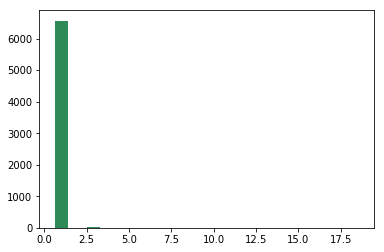

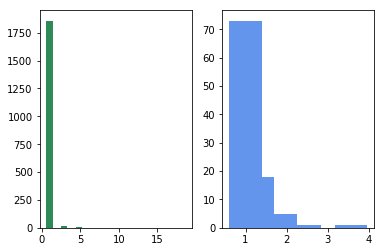

In [128]:
country_per_auction_per_bidder.columns = ['country_cnt_mean_auc']
fig, ax = plt.subplots()
heights, bins = np.histogram(country_per_auction_per_bidder['country_cnt_mean_auc'])
ax.bar(bins[:-1], heights, facecolor='seagreen')
print heights, bins

fig, ax = plt.subplots(1,2)

human_heights, human_bins = np.histogram(country_per_auction_per_bidder[country_per_auction_per_bidder.index.isin(human_bidder_id)]['country_cnt_mean_auc'])
ax[0].bar(human_bins[:-1], human_heights, facecolor='seagreen')
print human_heights, human_bins

tmp = country_per_auction_per_bidder[country_per_auction_per_bidder.index.isin(robot_bidder_id)]['country_cnt_mean_auc']
robot_heights, robot_bins = np.histogram(tmp)
ax[1].bar(robot_bins[:-1], robot_heights, facecolor='cornflowerblue')
print robot_heights, robot_bins

# [country_per_auction_per_bidder.index.isin(human_bidder_id)]
# print np.count_nonzero(country_per_auction_per_bidder != 1)
# print country_per_auction_per_bidder
# print np.count_nonzero(country_per_auction_per_bidder != 1)
# print np.count_nonzero(country_per_auction_per_bidder != 1)

In [129]:
country_per_auction_per_bidder.to_csv('country_cnt_per_auction_per_bidder.csv')

In [138]:
entropy_feat = pd.read_csv('entropy_feat_per_bidder.csv')

human_ip_entropy = entropy_feat[entropy_feat.bidder_id.isin(human_bidder_id)]['ip_entropy']
robot_ip_entropy = entropy_feat[entropy_feat.bidder_id.isin(robot_bidder_id)]['ip_entropy']
print np.mean(human_ip_entropy), np.median(human_ip_entropy), np.count_nonzero(human_ip_entropy==0.0)
print np.mean(robot_ip_entropy), np.median(robot_ip_entropy), np.count_nonzero(robot_ip_entropy==0.0)


10411.2466217 22.5521638531 463
32869.0149075 3128.57090094 11
